# 🌟 **GROUP FINAL PROJECT - GROUP 2** 🌟


# ✨ ***Data Processing File*** ✨

`File này sẽ chỉ tập trung vào xử lí dữ liệu cũng như vẽ biểu đồ thể hiện sự thay đổi trước và sau khi xử lí`

In [1298]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("/Users/macbook/Documents/Kì 1 Năm 3/Visualization/ProjectFinal/AmesHousing.csv")
nhom_1 = df.copy()
nhom_2 = df.copy()
nhom_3 = df.copy()
B = df.copy()
df_raw = df.copy()
df_clean = df.copy()

# **A, Feature Removal**

In [1299]:
cols_to_drop = ['Order', 'PID', #ID columns
                'Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu', 'Mas Vrn Type', #High missing values
                '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Misc Val', 'Bsmt Half Bath', 'Overall Cond', 'Low Qual Fin SF', 'Yr Sold', 'MS SubClass', #Low correlation
                'Garage Area', 'TotRms AbvGrd' # Multicollinear with 'Gr Liv Area'
                ] 
# Tổng cộng xoá 18 biến
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

**Các nhóm biến và lí do bị loại bỏ:**

* **Nhóm 1:** `Order`, `PID` Loại dựa theo bản chất

* **Nhóm 2:** `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`, `Mas Vrn Type` Loại dựa theo missing value quá cao

* **Nhóm 3:** `3Ssn Porch`, `Mo Sold`, `Pool Area`, `BsmtFin SF 2`, `Misc Val`, `Bsmt Half Bath`, `Overall Cond`, `Low Qual Fin SF`, `Yr Sold`, `MS SubClass` Loại dựa theo tương quan thấp đối với biến mục tiêu

* **Nhóm 4:** `Garage Area`, `TotRms AbvGrd` Loại dựa theo tương quan cao, dễ gây đa cộng tuyến


## ***Nhóm 1***

**`Order` và `PID` là 2 biến định danh, điều này được thể hiện qua việc số lượng giá trị duy nhất của cả 'Order' và 'PID' đều bằng tổng số hàng ($2930$)**

In [1300]:
# Biểu đồ

## ***Nhóm 2***

**Nhóm các biến gồm `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu` bị buộc phải loại bỏ vì tỉ lệ missing value quá cao**


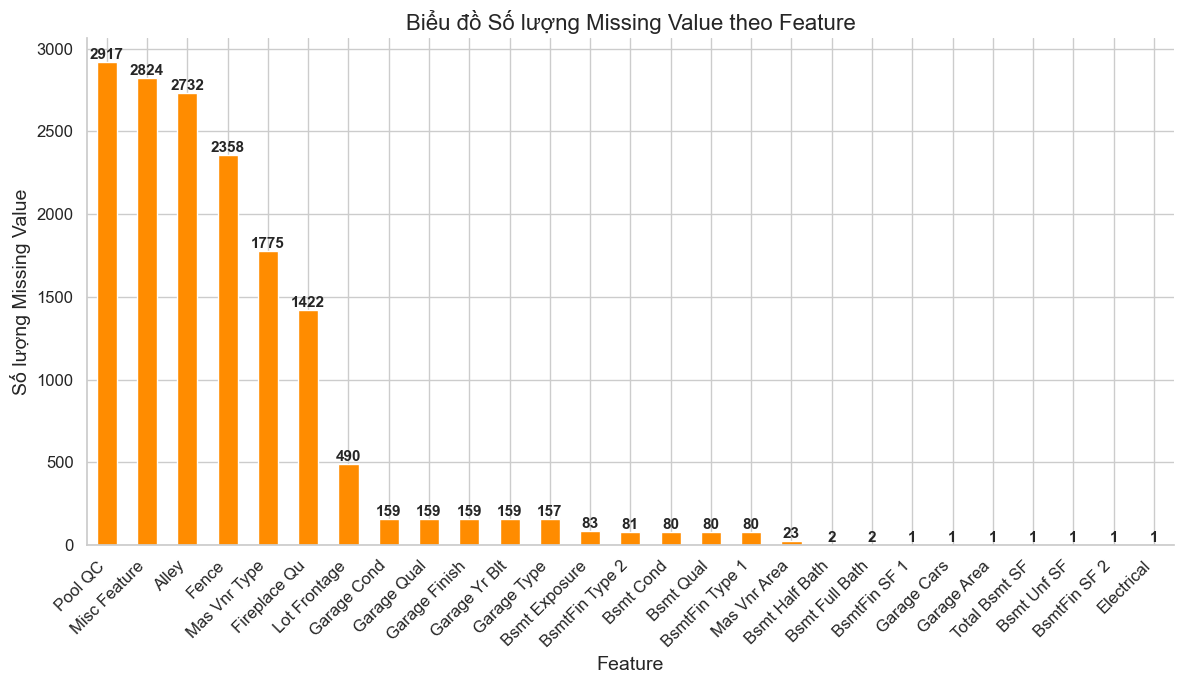

In [1301]:
missing_counts = nhom_2.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

if missing_counts.empty:
    print("Không có giá trị thiếu (missing values) nào trong dữ liệu để vẽ biểu đồ.")
else:
    plt.figure(figsize=(12, 7))
    ax = plt.gca() # Lấy đối tượng Axes hiện tại
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    missing_counts.plot(kind='bar', color='darkorange')

    plt.title('Biểu đồ Số lượng Missing Value theo Feature', fontsize=16)
    plt.xlabel('Feature', fontsize=14)
    plt.ylabel('Số lượng Missing Value', fontsize=14)
    
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    for i, count in enumerate(missing_counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.tight_layout()


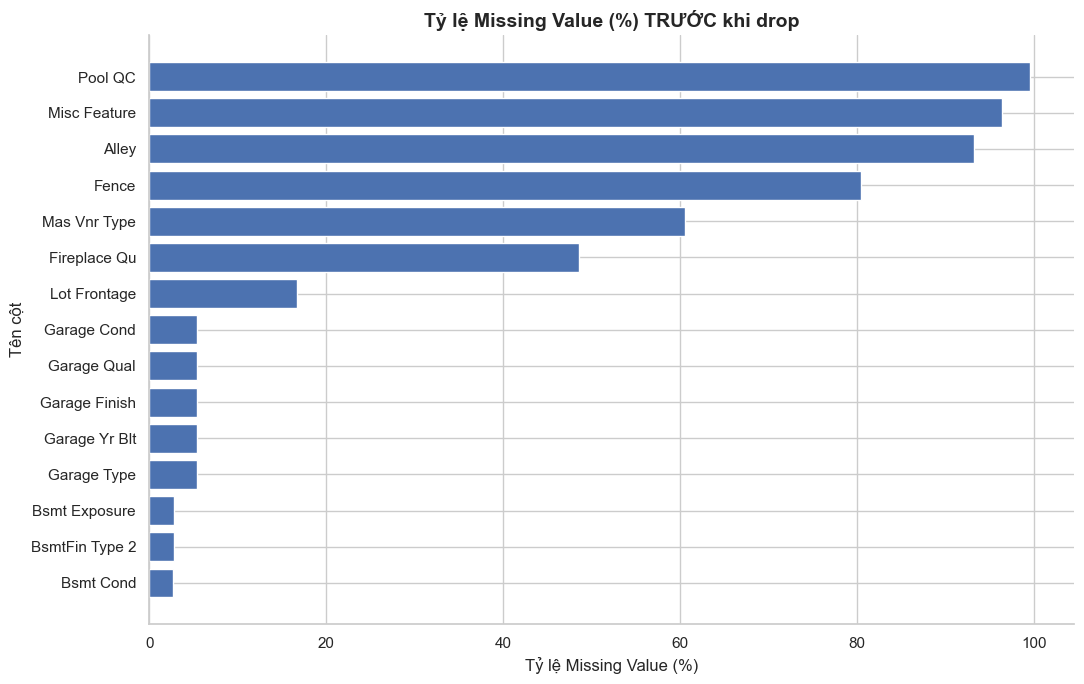

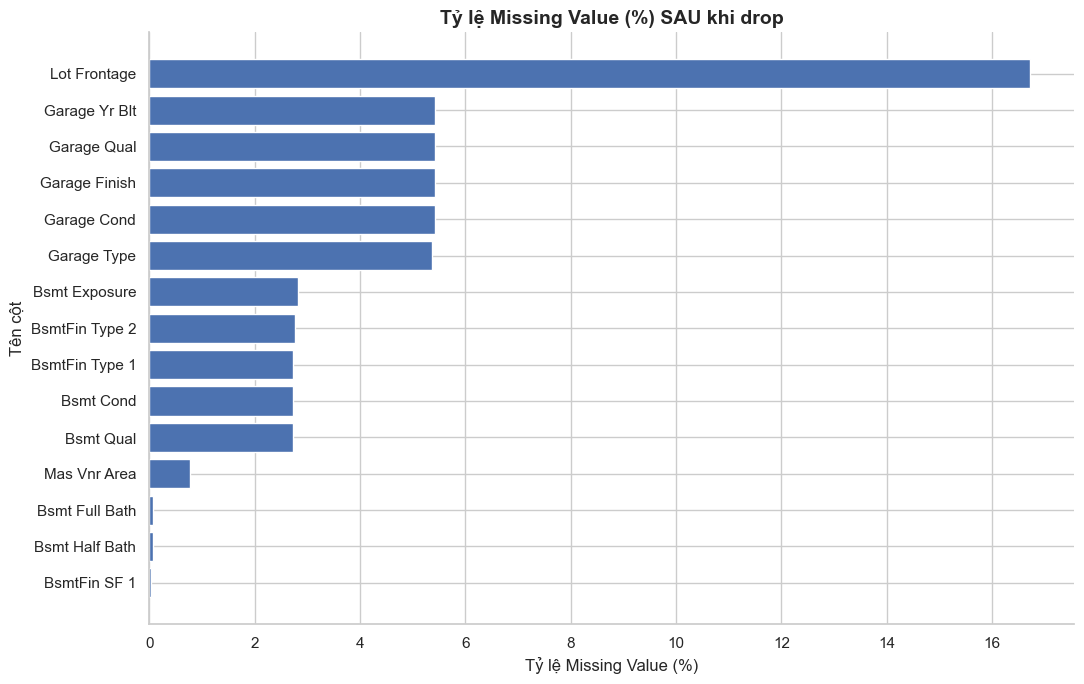

In [1302]:
def plot_missing_ratio(df, title, topn=15):
    miss_ratio = (df.isna().mean() * 100).round(2)
    miss_ratio = miss_ratio[miss_ratio > 0].sort_values(ascending=False).head(topn)

    plt.figure(figsize=(11,7))
    ax = plt.gca() # Lấy đối tượng Axes hiện tại
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.barh(miss_ratio.index[::-1], miss_ratio.values[::-1])  # đảo để cột lớn ở trên
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Tỷ lệ Missing Value (%)')
    plt.ylabel('Tên cột')
    plt.tight_layout()
    plt.show()

cols_to_drop = ['Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu', 'Mas Vnr Type']
nhom_2_cleaned = nhom_2.drop(columns=[c for c in cols_to_drop if c in nhom_2.columns])
# 4) Vẽ 2 biểu đồ tách rời
plot_missing_ratio(nhom_2,  'Tỷ lệ Missing Value (%) TRƯỚC khi drop', topn=15)
plot_missing_ratio(nhom_2_cleaned,'Tỷ lệ Missing Value (%) SAU khi drop',   topn=15)


## ***Nhóm 3***

**Nhóm các biến `3Ssn Porch`, `Mo Sold`, `Pool Area`, `BsmtFin SF 2`, `Misc Val`, `Bsmt Half Bath`, `Overall Cond`, `Low Qual Fin SF`, `Yr Sold`, `MS SubClass` bị loại bỏ dựa theo tương quan thấp đối với biến mục tiêu (< 0.05)**

/var/folders/dm/fk87zbb17nzb594pksfvrc4c0000gn/T/ipykernel_65838/2608327864.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')


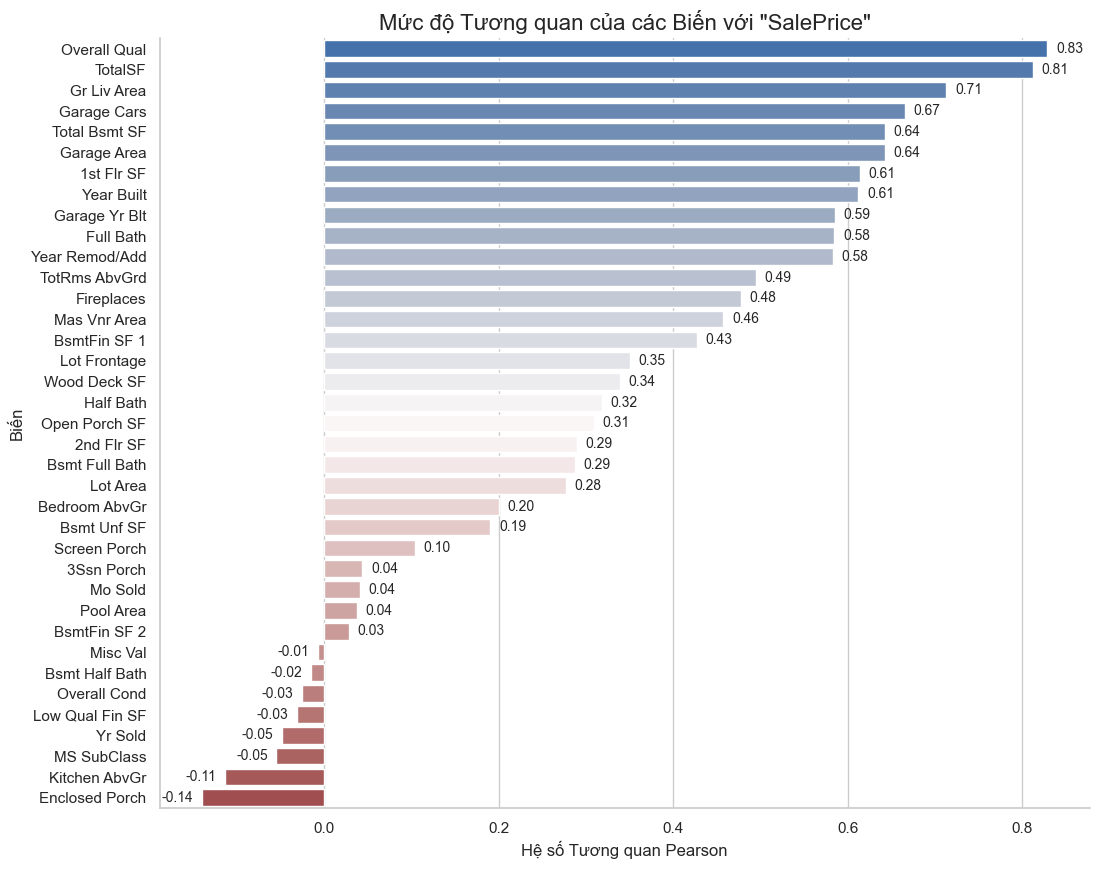

In [1303]:
indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
nhom_3 = nhom_3.drop(index=indices_to_drop, axis=0)

nhom_3 = nhom_3[nhom_3['Gr Liv Area'] < 4000]
y_raw = nhom_3['SalePrice']

y_log = np.log1p(nhom_3['SalePrice']) 

cols_to_drop = ['Order', 'PID', 'Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu'] 
nhom_3 = nhom_3.drop(columns=[c for c in cols_to_drop if c in nhom_3.columns])

nhom_3['TotalSF'] = nhom_3['Total Bsmt SF'] + nhom_3['1st Flr SF'] + nhom_3['2nd Flr SF']

X_train, X_test, y_train_log, y_test_log = train_test_split(nhom_3, y_log, test_size=0.3, random_state=42)

train_analysis = X_train.copy()
train_analysis['SalePrice'] = y_train_log
corr_matrix = train_analysis.corr(method="pearson", numeric_only=True)

target_var = 'SalePrice'
corr_with_target = corr_matrix[target_var].sort_values(ascending=False)
corr_with_target = corr_with_target.drop(target_var)

plt.figure(figsize=(12, 10))
ax = plt.gca() # Lấy đối tượng Axes hiện tại
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')
plt.title(f'Mức độ Tương quan của các Biến với "{target_var}"', fontsize=16)
plt.xlabel('Hệ số Tương quan Pearson')
plt.ylabel('Biến')

for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    if width > 0:
        x = width + 0.01
        ha = 'left'
    else:
        x = width - 0.01
        ha = 'right'
    ax.text(
        x=x,                 # Vị trí x
        y=y,                 # Vị trí y
        s=f'{width:.2f}',    # Văn bản cần hiển thị (làm tròn 2 chữ số)
        ha=ha,               # Căn lề ngang
        va='center',         # Căn lề dọc
        fontsize=10
    )
plt.show()

## ***Nhóm 4***

**2 biến`Garage Area`, `TotRms AbvGrd` bị loại dựa theo tương quan cao của chúng với một biến khác, dễ gây đa cộng tuyến**

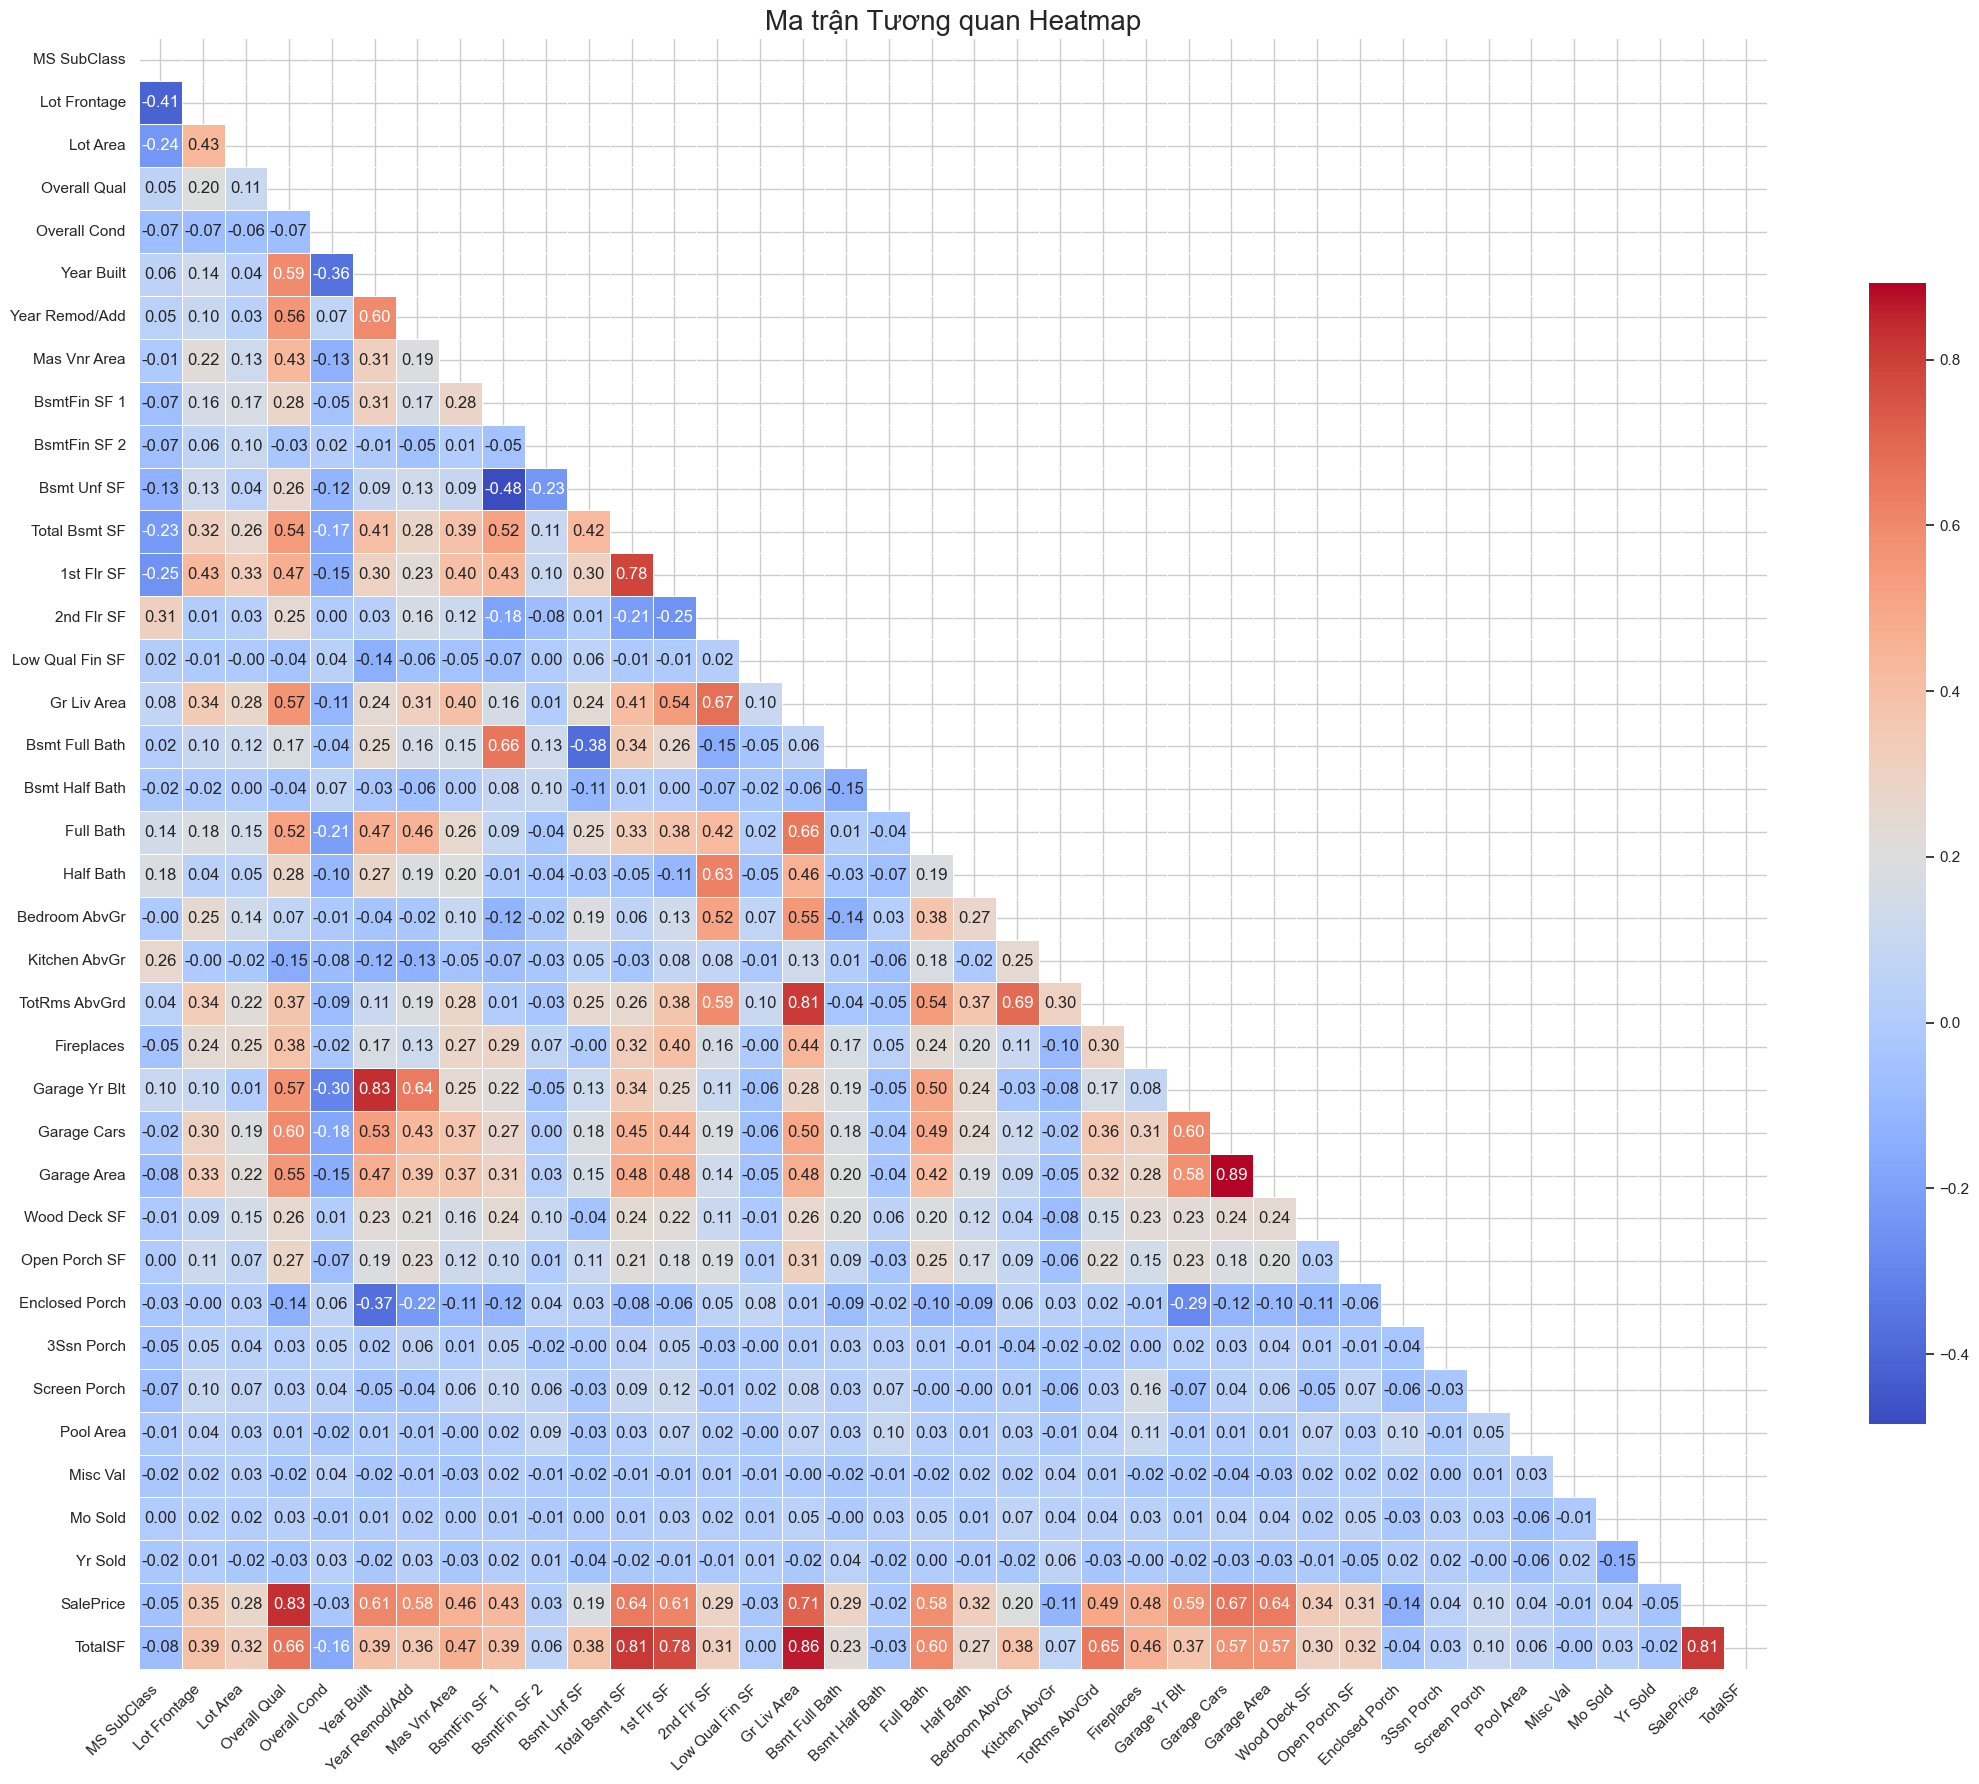

In [1304]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(22, 18)) 
sns.heatmap(
    corr_matrix, 
    mask=mask,              
    cmap='coolwarm',
    annot=True,              
    fmt='.2f',              
    annot_kws={"size": 12},         
    linewidths=.5,
    cbar_kws={"shrink": .7}  
)
plt.title('Ma trận Tương quan Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **B, Outliers Handling**

In [1305]:
indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
df = df.drop(index=indices_to_drop, axis=0)
df = df[df['Gr Liv Area'] < 4000]

**Các tên biến cũng như index hàng chứa outlier của biến đó và lí do bị loại bỏ:**

* **`Gr Liv Area`:** 1498(trùng), 2180(trùng), 2181

* **`Garage Cars`:** 746

* **`Total Bsmt SF`:** 1498(trùng), 2180(trùng)

* **`Garage Area`:** 1258, 1498(trùng), 426

* **`1st Flr SF`:** 1498(trùng), 2180(trùng), 1497

* **`Garage Yr Blt`:** 2260


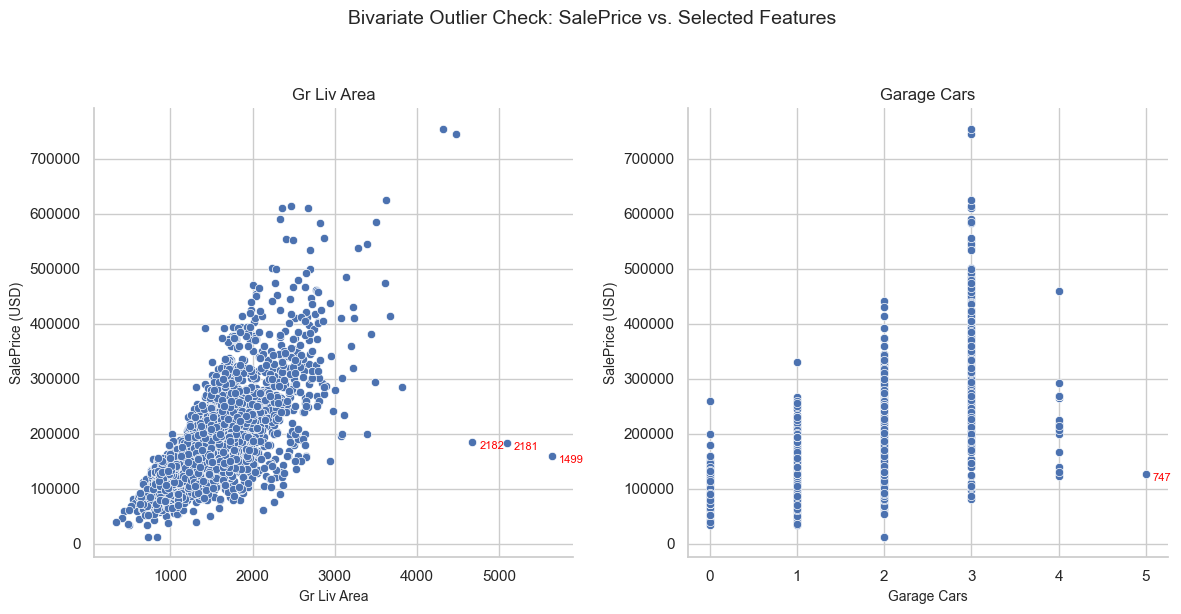

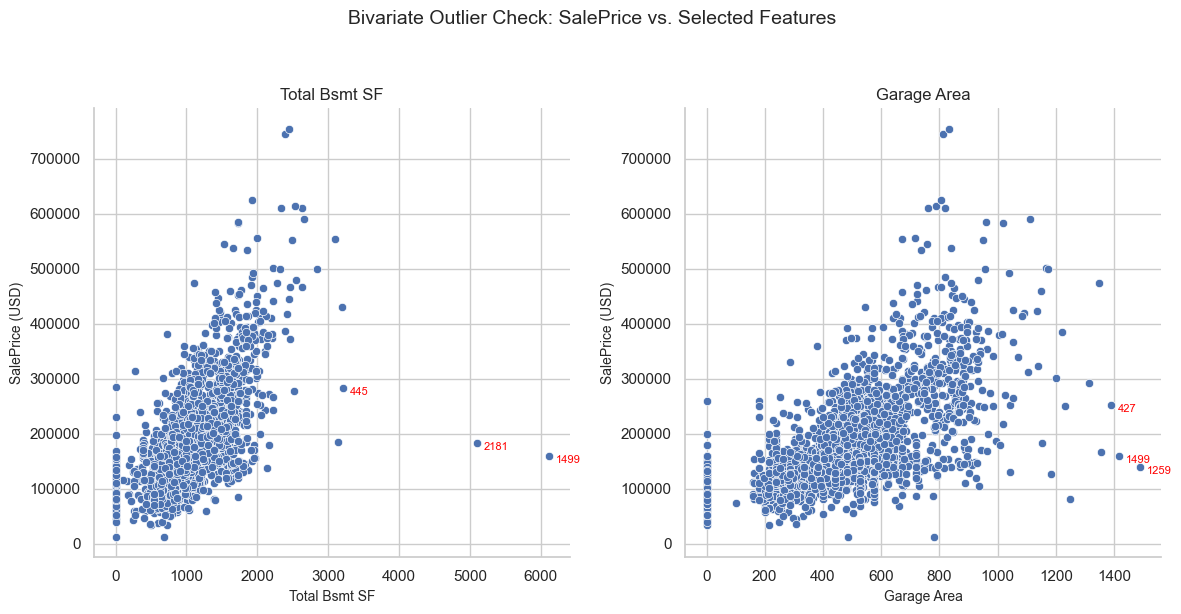

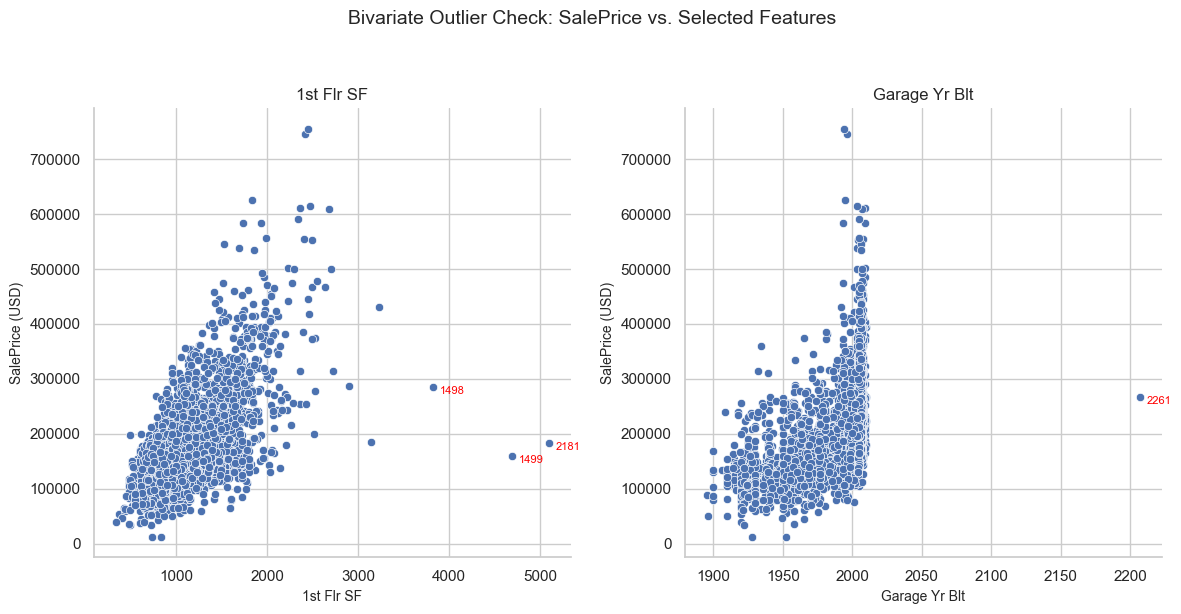

In [1306]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

features_to_check = [
    'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Garage Yr Blt'
]
for i in range(0, len(features_to_check), 2):
    
    current_features = features_to_check[i:i + 2]
    num_plots = len(current_features)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))
    if num_plots == 1:
        axes = [axes]
    
    for j, feature in enumerate(current_features):
        
        ax = axes[j]
        sns.scatterplot(x=feature, y='SalePrice', data=B, ax=ax)
        ax.set_title(f'{feature}', fontsize=12)
        ax.set_xlabel(f'{feature}', fontsize=10)
        ax.set_ylabel('SalePrice (USD)', fontsize=10)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        extreme_value = B[feature].quantile(0.999)
        outliers_to_note = B[B[feature] > extreme_value].sort_values(by='SalePrice')
        
        for k in range(len(outliers_to_note)):
            ax.annotate(
                f"{outliers_to_note['Order'].iloc[k]}",
                (outliers_to_note[feature].iloc[k], outliers_to_note['SalePrice'].iloc[k]),
                textcoords="offset points", 
                xytext=(5, -5),              
                ha='left',                   
                fontsize=8,                  
                color='red'                  
            )


    plt.suptitle('Bivariate Outlier Check: SalePrice vs. Selected Features', y=1.02, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Điều chỉnh layout để tiêu đề chung không bị cắt
    plt.show() 

# **C, Feature Engineering**

In [1307]:
df['TotalSF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']

In [1308]:
y_log = np.log1p(df['SalePrice'])

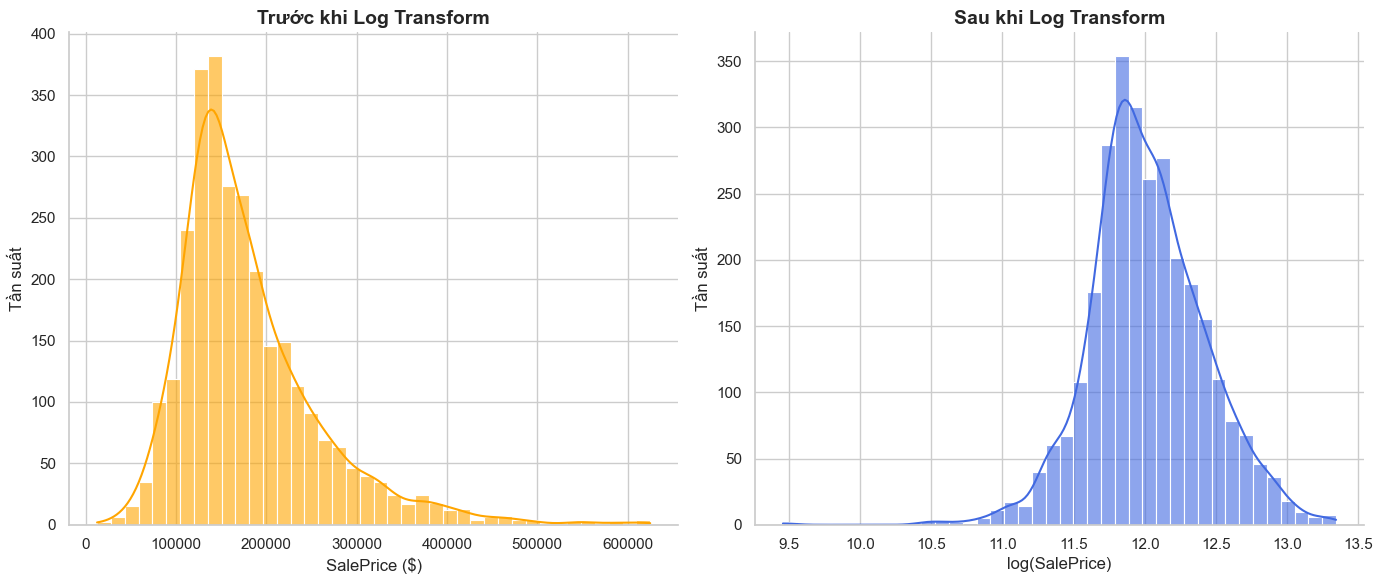

In [1309]:
# Thiết lập kích thước figure
plt.figure(figsize=(14,6))

# 1️⃣ Trước khi log-transform
plt.subplot(1, 2, 1)
ax = plt.gca() # Lấy đối tượng Axes hiện tại
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.histplot(y_raw, kde=True, bins=40, color='orange', alpha=0.6)
plt.title('Trước khi Log Transform', fontsize=14, fontweight='bold')
plt.xlabel('SalePrice ($)')
plt.ylabel('Tần suất')

# 2️⃣ Sau khi log-transform
plt.subplot(1, 2, 2)
ax = plt.gca() # Lấy đối tượng Axes hiện tại
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.histplot(y_log, kde=True, bins=40, color='royalblue', alpha=0.6)
plt.title('Sau khi Log Transform', fontsize=14, fontweight='bold')
plt.xlabel('log(SalePrice)')
plt.ylabel('Tần suất')


plt.tight_layout()
plt.show()


# **D, Model Training**

In [1310]:
y_raw = df['SalePrice']

y_log = np.log1p(df['SalePrice'])

X_train, X_test, y_train_log, y_test_log = train_test_split(df, y_log, test_size=0.3, random_state=42)

numeric_cols_of_X_train = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_of_X_train = X_train.select_dtypes(include=['object']).columns.tolist()

In [1311]:

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Điền missing bằng trung vị
    ('scaler', StandardScaler())                   # Chuẩn hóa
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Điền missing
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # Mã hóa One-hot
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_of_X_train),
        ('cat', categorical_transformer, categorical_cols_of_X_train)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectPercentile(f_regression, percentile=50)), # Giữ lại 50% đặc trưng tốt nhất
    ('regressor', LinearRegression())
])

model_pipeline.fit(X_train, y_train_log)
y_pred_log = model_pipeline.predict(X_test)
y_pred_raw = np.expm1(y_pred_log) 
y_test_raw = y_raw.loc[y_test_log.index]

# **E, Model Evaluation**

In [1312]:
rmse_dollar = np.sqrt(mean_squared_error(y_test_raw, y_pred_raw))
mae_dollar = mean_absolute_error(y_test_raw, y_pred_raw)
r2 = r2_score(y_test_raw, y_pred_raw)

print(f"Linear Regression - Real RMSE: ${rmse_dollar:,.2f}")
print(f"Linear Regression - Real MAE: ${mae_dollar:,.2f}")
print(f"Linear Regression - R2 Score: {r2:.4f}")

Linear Regression - Real RMSE: $22,775.76
Linear Regression - Real MAE: $9,640.36
Linear Regression - R2 Score: 0.9098


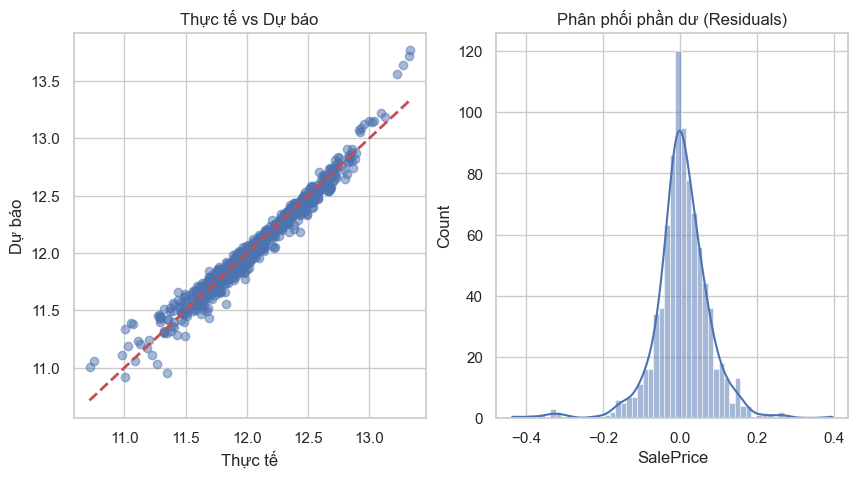

In [1313]:
residuals = y_test_log - y_pred_log

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test_log, y_pred_log, alpha=0.5)
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'r--', lw=2)
plt.xlabel('Thực tế')
plt.ylabel('Dự báo')
plt.title('Thực tế vs Dự báo')

plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.title('Phân phối phần dư (Residuals)')
plt.show()

# **F, Baseline Model**

In [1314]:
def raw_approach(df):
    # Chỉ lấy số, điền 0 vào chỗ trống
    df_raw = df.select_dtypes(include=[np.number]).copy()
    df_raw = df_raw.fillna(0) 
    
    X = df_raw.drop(['SalePrice', 'Order', 'PID'], axis=1, errors='ignore')
    y = df_raw['SalePrice']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

raw_r2, raw_mae, raw_rmse = raw_approach(df_raw)

def expert_approach(df):
    df_clean = df.copy()
    cols_to_drop = ['Order', 'PID', #ID columns
                'Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu', 'Mas Vrn Type', #High missing values
                '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Misc Val', 'Bsmt Half Bath', 'Overall Cond', 'Low Qual Fin SF', 'Yr Sold', 'MS SubClass', #Low correlation
                'Garage Area', 'TotRms AbvGrd' # Multicollinear with 'Gr Liv Area'
                ] 
    # Tổng cộng xoá 18 biến
    df_clean = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns])
    
    # 1. Loại bỏ Outlier (Quan trọng!)
    indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
    df_clean = df_clean.drop(index=indices_to_drop, axis=0)
    df_clean = df_clean[df_clean['Gr Liv Area'] < 4000]
    
    df_clean['TotalSF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
    y_log = np.log1p(df_clean['SalePrice']) 
    y_raw = df_clean['SalePrice'] 
    y_log = np.log1p(df_clean['SalePrice']) 
    # 3. Tạo đặc trưng mới (Feature Engineering)
    df_clean['TotalSF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
    
    X_train, X_test, y_train_log, y_test_log = train_test_split(df_clean, y_log, test_size=0.3, random_state=42)

    numeric_cols_of_X_train = X_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols_of_X_train = X_train.select_dtypes(include=['object']).columns.tolist()
    
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')), # Điền missing bằng trung vị
        ('scaler', StandardScaler())                   # Chuẩn hóa
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Điền missing
        ('encoder', OneHotEncoder(handle_unknown='ignore')) # Mã hóa One-hot
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols_of_X_train),
            ('cat', categorical_transformer, categorical_cols_of_X_train)
        ])

    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectPercentile(f_regression, percentile=50)), # Giữ lại 50% đặc trưng tốt nhất
        ('regressor', LinearRegression())
    ])

    model_pipeline.fit(X_train, y_train_log)
    y_pred_log = model_pipeline.predict(X_test)
    y_pred_raw = np.expm1(y_pred_log) 
    y_test_raw = y_raw.loc[y_test_log.index]
    
    return r2_score(y_test_raw, y_pred_raw), mean_absolute_error(y_test_raw, y_pred_raw), np.sqrt(mean_squared_error(y_test_raw, y_pred_raw))

clean_r2, clean_mae, clean_rmse = expert_approach(df_clean)

print(f"Kết quả Raw(R²): {raw_r2:.2f}")
print(f"Kết quả Raw (MAE): {raw_mae:.2f}")
print(f"Kết quả Raw (RMSE): {raw_rmse:.2f}")
print(f"Kết quả Clean(R²): {clean_r2:.2f}")
print(f"Kết quả Clean (MAE): {clean_mae:.2f}")
print(f"Kết quả Clean (RMSE): {clean_rmse:.2f}")


Kết quả Raw(R²): 0.85
Kết quả Raw (MAE): 20834.50
Kết quả Raw (RMSE): 32940.98
Kết quả Clean(R²): 0.91
Kết quả Clean (MAE): 9640.36
Kết quả Clean (RMSE): 22775.76


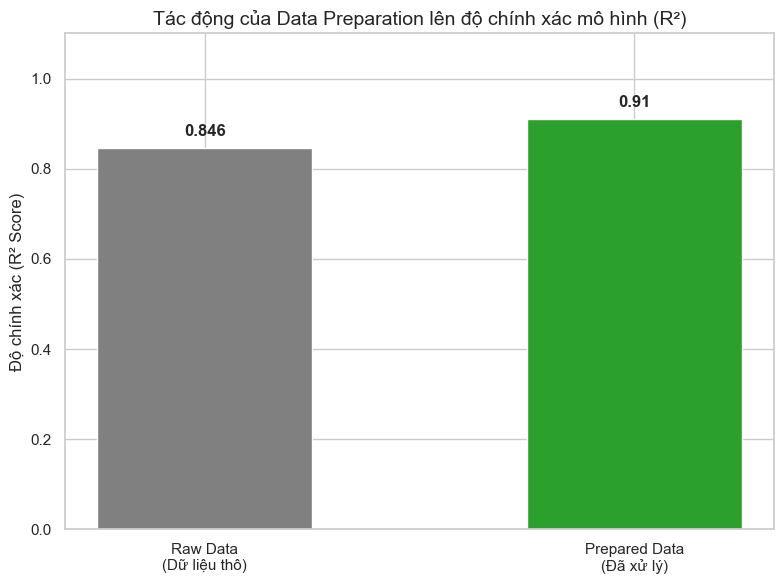

In [1315]:
plt.figure(figsize=(8, 6))
r2_performances = [raw_r2, clean_r2]
labels = ['Raw Data\n(Dữ liệu thô)', 'Prepared Data\n(Đã xử lý)']
colors = ['gray', '#2ca02c'] 
bars = plt.bar(labels, r2_performances, color=colors, width=0.5)
plt.ylim(0, 1.1)
plt.title("Tác động của Data Preparation lên độ chính xác mô hình (R²)", fontsize=14)
plt.ylabel("Độ chính xác (R² Score)", fontsize=12)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, 
            f"{round(yval, 3)}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()